In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn  as sns

In [2]:
def missing_value(val):
    total = val.isnull().sum().sort_values(ascending = False)
    percent = (val.isnull().sum()/val.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

In [3]:
credit_card_balance = pd.read_csv('../input/home-credit-default-risk/credit_card_balance.csv')

# CLEANING AND FEATURE ENGINEERING

## 1.CREDIT CARD BALANCE

In [4]:
# CORRELATION
cor_matrix = credit_card_balance.corr()
cor_matrix

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,SK_DPD,SK_DPD_DEF
SK_ID_PREV,1.000000,0.004723,0.003670,0.005046,0.006631,0.004342,0.002624,-0.000160,0.001721,0.006460,...,0.005140,0.005035,0.005032,0.002821,0.000367,-0.001412,0.000809,-0.007219,-0.001786,0.001973
SK_ID_CURR,0.004723,1.000000,0.001696,0.003510,0.005991,0.000814,0.000708,0.000958,-0.000786,0.003300,...,0.003589,0.003518,0.003524,0.002082,0.002654,-0.000131,0.002135,-0.000581,-0.000962,0.001519
MONTHS_BALANCE,0.003670,0.001696,1.000000,0.014558,0.199900,0.036802,0.065527,0.000405,0.118146,-0.087529,...,0.016266,0.013172,0.013084,0.002536,0.113321,-0.026192,0.160207,-0.008620,0.039434,0.001659
AMT_BALANCE,0.005046,0.003510,0.014558,1.000000,0.489386,0.283551,0.336965,0.065366,0.169449,0.896728,...,0.999720,0.999917,0.999897,0.309968,0.259184,0.046563,0.155553,0.005009,-0.046988,0.013009
AMT_CREDIT_LIMIT_ACTUAL,0.006631,0.005991,0.199900,0.489386,1.000000,0.247219,0.263093,0.050579,0.234976,0.467620,...,0.490445,0.488641,0.488598,0.221808,0.204237,0.030051,0.202868,-0.157269,-0.038791,-0.002236
AMT_DRAWINGS_ATM_CURRENT,0.004342,0.000814,0.036802,0.283551,0.247219,1.000000,0.800190,0.017899,0.078971,0.094824,...,0.280402,0.278290,0.278260,0.732907,0.298173,0.013254,0.076083,-0.103721,-0.022044,-0.003360
AMT_DRAWINGS_CURRENT,0.002624,0.000708,0.065527,0.336965,0.263093,0.800190,1.000000,0.236297,0.615591,0.124469,...,0.337117,0.332831,0.332796,0.594361,0.523016,0.140032,0.359001,-0.093491,-0.020606,-0.003137
AMT_DRAWINGS_OTHER_CURRENT,-0.000160,0.000958,0.000405,0.065366,0.050579,0.017899,0.236297,1.000000,0.007382,0.002158,...,0.066108,0.064929,0.064923,0.012008,0.021271,0.575295,0.004458,-0.023013,-0.003693,-0.000568
AMT_DRAWINGS_POS_CURRENT,0.001721,-0.000786,0.118146,0.169449,0.234976,0.078971,0.615591,0.007382,1.000000,0.063562,...,0.173745,0.168974,0.168950,0.072658,0.520123,0.007620,0.542556,-0.106813,-0.015040,-0.002384
AMT_INST_MIN_REGULARITY,0.006460,0.003300,-0.087529,0.896728,0.467620,0.094824,0.124469,0.002158,0.063562,1.000000,...,0.896030,0.897617,0.897587,0.170616,0.148262,0.014360,0.086729,0.064320,-0.061484,-0.005715


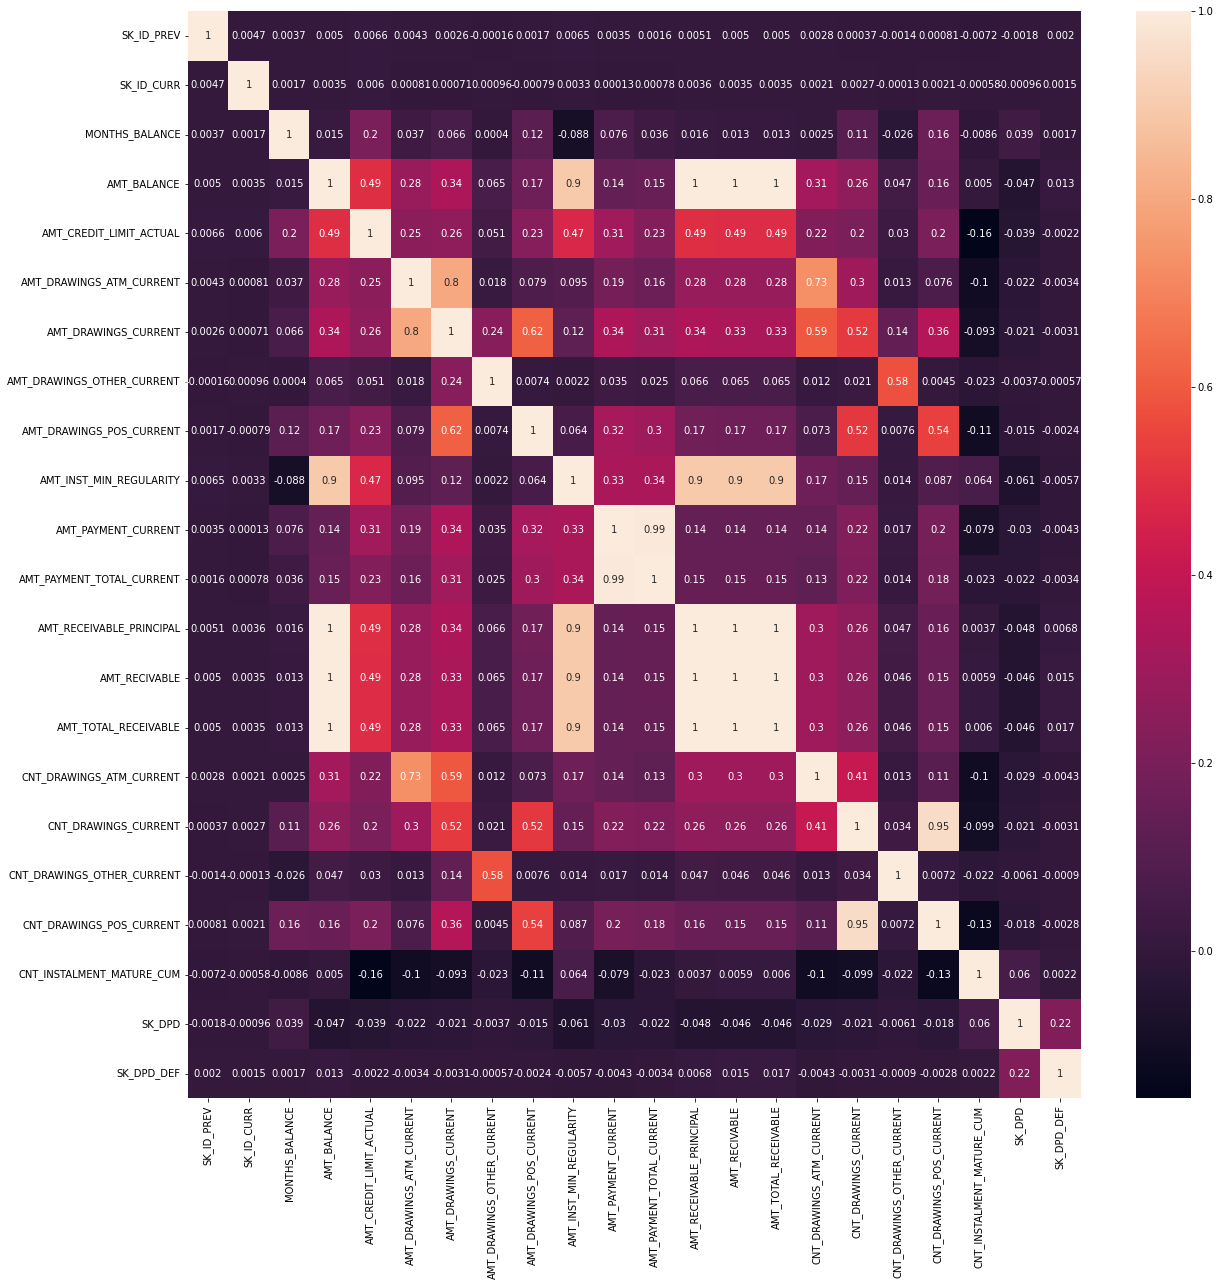

In [5]:
plt.figure(figsize=(20,20))
sns.heatmap(credit_card_balance.corr(),annot=True)
plt.show()

In [6]:
# FIND HIGH CORRELATED COLUMNS 

# Correlation matrix will be mirror image about the diagonal and all the 
# diagonal elements will be 1. So we choose between upper or lower triangular Correlation matrix

upper_tri= cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool_))
to_drop = []
for column in upper_tri.columns:
    for index in upper_tri.index:
        if upper_tri.loc[index, column]>= 0.9:
            to_drop.append((index,column))
print('Features that have high correlation to each other (> 0.9) ')
to_drop

Features that have high correlation to each other (> 0.9) 


[('AMT_PAYMENT_CURRENT', 'AMT_PAYMENT_TOTAL_CURRENT'),
 ('AMT_BALANCE', 'AMT_RECEIVABLE_PRINCIPAL'),
 ('AMT_BALANCE', 'AMT_RECIVABLE'),
 ('AMT_RECEIVABLE_PRINCIPAL', 'AMT_RECIVABLE'),
 ('AMT_BALANCE', 'AMT_TOTAL_RECEIVABLE'),
 ('AMT_RECEIVABLE_PRINCIPAL', 'AMT_TOTAL_RECEIVABLE'),
 ('AMT_RECIVABLE', 'AMT_TOTAL_RECEIVABLE'),
 ('CNT_DRAWINGS_CURRENT', 'CNT_DRAWINGS_POS_CURRENT')]

In [7]:
missing_value(credit_card_balance)['Percent']

AMT_PAYMENT_CURRENT           19.998063
AMT_DRAWINGS_ATM_CURRENT      19.524872
CNT_DRAWINGS_POS_CURRENT      19.524872
AMT_DRAWINGS_OTHER_CURRENT    19.524872
AMT_DRAWINGS_POS_CURRENT      19.524872
CNT_DRAWINGS_OTHER_CURRENT    19.524872
CNT_DRAWINGS_ATM_CURRENT      19.524872
CNT_INSTALMENT_MATURE_CUM      7.948208
AMT_INST_MIN_REGULARITY        7.948208
SK_ID_PREV                     0.000000
AMT_TOTAL_RECEIVABLE           0.000000
SK_DPD                         0.000000
NAME_CONTRACT_STATUS           0.000000
CNT_DRAWINGS_CURRENT           0.000000
AMT_PAYMENT_TOTAL_CURRENT      0.000000
AMT_RECIVABLE                  0.000000
AMT_RECEIVABLE_PRINCIPAL       0.000000
SK_ID_CURR                     0.000000
AMT_DRAWINGS_CURRENT           0.000000
AMT_CREDIT_LIMIT_ACTUAL        0.000000
AMT_BALANCE                    0.000000
MONTHS_BALANCE                 0.000000
SK_DPD_DEF                     0.000000
Name: Percent, dtype: float64

In [8]:
to_drop = []

# drop AMT_PAYMENT_CURRENT instead of AMT_PAYMENT_TOTAL_CURRENT 
# since percentage of null values of AMT_PAYMENT_CURRENT (19.9%) > AMT_PAYMENT_TOTAL_CURRENT (0%)
to_drop.append('AMT_PAYMENT_CURRENT')

# High correlated feature and can be replaced by AMT_PAYMENT_TOTAL_CURRENT
to_drop.append('AMT_RECEIVABLE_PRINCIPAL')
to_drop.append('AMT_RECIVABLE')
to_drop.append('AMT_BALANCE')
# High percentage of null values and can be represented by CNT_DRAWINGS_CURRENT
to_drop.append('CNT_DRAWINGS_POS_CURRENT')
to_drop.append('CNT_DRAWINGS_OTHER_CURRENT')
to_drop.append('CNT_DRAWINGS_ATM_CURRENT')

# The same reason can be applied to AMT_DRAWINGS_CURRENT
to_drop.append('AMT_DRAWINGS_POS_CURRENT')
to_drop.append('AMT_DRAWINGS_OTHER_CURRENT')
to_drop.append('AMT_DRAWINGS_ATM_CURRENT')

# delete existing column in POS_CASH_balance

to_drop.append('NAME_CONTRACT_STATUS')
to_drop.append('SK_DPD')
to_drop.append('SK_DPD_DEF')

In [9]:
credit_card_balance.drop(columns=to_drop,inplace=True, axis=1)

In [10]:
credit_card_balance.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'MONTHS_BALANCE', 'AMT_CREDIT_LIMIT_ACTUAL',
       'AMT_DRAWINGS_CURRENT', 'AMT_INST_MIN_REGULARITY',
       'AMT_PAYMENT_TOTAL_CURRENT', 'AMT_TOTAL_RECEIVABLE',
       'CNT_DRAWINGS_CURRENT', 'CNT_INSTALMENT_MATURE_CUM'],
      dtype='object')

In [11]:
credit_card_balance.shape

(3840312, 10)

In [12]:
credit_card_balance.to_csv('credit_card_balance_new.csv', index=False)

## 2. INSTALLMENTS_PAYMENTS

In [14]:
installments_payments = pd.read_csv('../input/home-credit-default-risk/installments_payments.csv')

In [15]:
corr= installments_payments.corr()
corr

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
SK_ID_PREV,1.000000,0.002132,0.000685,-0.002095,0.003748,0.003734,0.002042,0.001887
SK_ID_CURR,0.002132,1.000000,0.000480,-0.000548,0.001191,0.001215,-0.000226,-0.000124
NUM_INSTALMENT_VERSION,0.000685,0.000480,1.000000,-0.323414,0.130244,0.128124,0.168109,0.177176
NUM_INSTALMENT_NUMBER,-0.002095,-0.000548,-0.323414,1.000000,0.090286,0.094305,-0.089640,-0.087664
DAYS_INSTALMENT,0.003748,0.001191,0.130244,0.090286,1.000000,0.999491,0.125985,0.127018
DAYS_ENTRY_PAYMENT,0.003734,0.001215,0.128124,0.094305,0.999491,1.000000,0.125555,0.126602
AMT_INSTALMENT,0.002042,-0.000226,0.168109,-0.089640,0.125985,0.125555,1.000000,0.937191
AMT_PAYMENT,0.001887,-0.000124,0.177176,-0.087664,0.127018,0.126602,0.937191,1.000000


In [16]:
corr = installments_payments.corr()

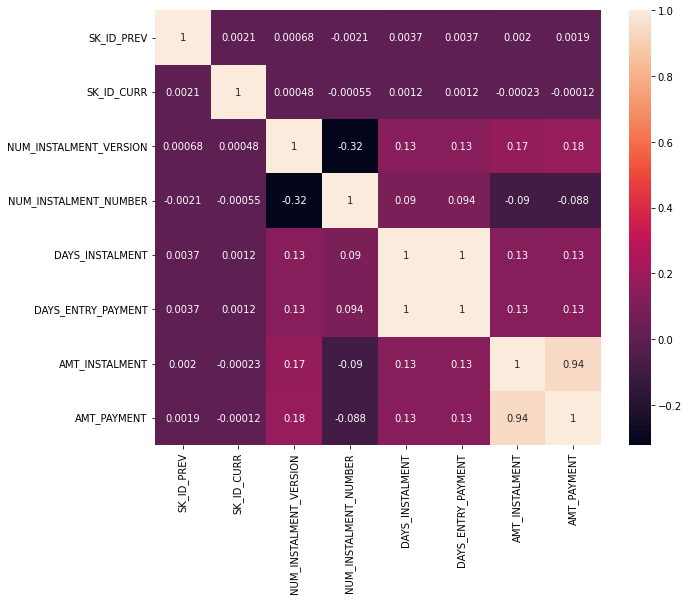

In [17]:
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True)
plt.show()

In [18]:
# FIND HIGH CORRELATED COLUMNS 

# Correlation matrix will be mirror image about the diagonal and all the 
# diagonal elements will be 1. So we choose between upper or lower triangular Correlation matrix
upper= corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool_))
a_drop = []
for column in upper.columns:
    for index in upper.index:
        if upper.loc[index, column]>= 0.9:
            a_drop.append((index,column))
print('Features that have high correlation to each other (>0.9) ')
a_drop

Features that have high correlation to each other (>0.9) 


[('DAYS_INSTALMENT', 'DAYS_ENTRY_PAYMENT'), ('AMT_INSTALMENT', 'AMT_PAYMENT')]

In [19]:
a_drop =[]
a_drop.append('DAYS_ENTRY_PAYMENT')
a_drop.append('AMT_PAYMENT')

In [20]:
installments_payments.drop(columns=a_drop, inplace = True, axis=1)

In [21]:
installments_payments.shape

(13605401, 6)

In [22]:
installments_payments.to_csv('installments_payments_new.csv', index=False)